In [1]:
import pandas as pd
import seaborn as sns
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np

In [2]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='18Mar@2004',
    database='ecom'
)
cursor = conn.cursor()

In [3]:
#List all unique cities where customers are located.

In [4]:
query="""select distinct customer_city from customers"""
cursor.execute(query)
data=cursor.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [5]:
#Count the number of orders placed in 2017.

In [6]:
query="""select count(order_id)  from orders where year(order_purchase_timestamp)=2017"""
cursor.execute(query)
data=cursor.fetchall()
data

[(45101,)]

In [7]:
#Find the total sales per category.

In [8]:
query="""select p.product_category category,round(sum(py.payment_value),2) sales from products as p join order_items as o on p.product_id=o.product_id join payments as py on py.order_id=o.order_id group by category"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["category","sales"])
df

,category,sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


In [9]:
#Calculate the percentage of orders that were paid in installments.

In [10]:
query = """
SELECT 
    (SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END) * 100.0) / COUNT(*) 
FROM payments
"""
cursor.execute(query)
data = cursor.fetchall()
print(data)


[(Decimal('99.99807'),)]


In [11]:
#Count the number of customers from each state. 

In [12]:
query = """
SELECT 
    count(customer_id) count,customer_state from customers group by customer_state
"""
cursor.execute(query)
data = cursor.fetchall()
df=pd.DataFrame(data,columns=["count","state"])
df



,count,state
0,41746,SP
1,3637,SC
2,11635,MG
3,5045,PR
4,12852,RJ
5,5466,RS
6,975,PA
7,2020,GO
8,2033,ES
9,3380,BA


In [13]:
# Calculate the number of orders per month in 2018.

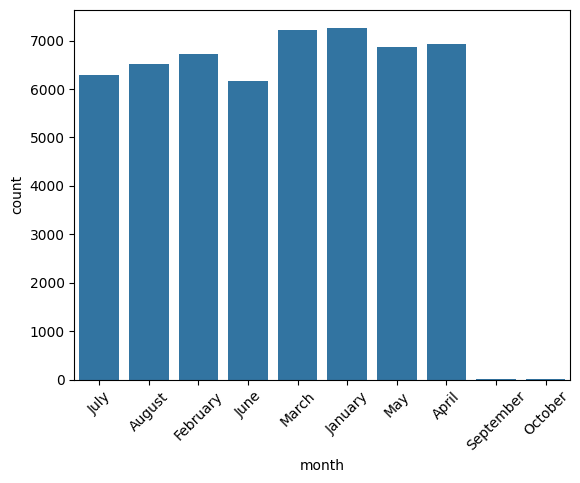

In [14]:
query = """
SELECT 
   count(order_id) count,(monthname(order_purchase_timestamp)) month from orders where year(order_purchase_timestamp)=2018 group by month
"""
cursor.execute(query)
data = cursor.fetchall()
df=pd.DataFrame(data,columns=["count","month"])

sns.barplot(x=df["month"],y=df["count"],data=df)
plt.xticks(rotation=45)

plt.show()
                


In [15]:
#Calculate the percentage of total revenue contributed by each product category.

In [16]:
query = """
SELECT 
  ROUND((SUM(py.payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100, 2) AS count,
  product_category
FROM payments AS py 
JOIN order_items ON py.order_id = order_items.order_id 
JOIN products ON order_items.product_id = products.product_id 
GROUP BY product_category order by count desc
"""
cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data, columns=["percentage distribution", "category"])
print(df)


    percentage distribution                     category
0                     10.70               bed table bath
1                     10.35                HEALTH BEAUTY
2                      9.90         computer accessories
3                      8.93         Furniture Decoration
4                      8.93              Watches present
..                      ...                          ...
69                     0.01              House Comfort 2
70                     0.01               cds music dvds
71                     0.01                     PC Gamer
72                     0.00  Fashion Children's Clothing
73                     0.00       insurance and services

[74 rows x 2 columns]


In [17]:
#Identify the correlation between product price and the number of times a product has been purchased.

In [18]:
query = """
SELECT 
  p.product_category,
  COUNT(o.product_id),
  ROUND(AVG(o.price), 2)
FROM products p 
JOIN order_items o ON p.product_id = o.product_id 
GROUP BY p.product_category
"""

cursor.execute(query)
data = cursor.fetchall()

# Define column names in a single list
df = pd.DataFrame(data, columns=["category", "product_count", "avg_price"])
arr1=df["product_count"]
arr2=df["avg_price"]
np.corrcoef([arr1,arr2])




array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

In [19]:
#Calculate the total revenue generated by each seller, and rank them by revenue.

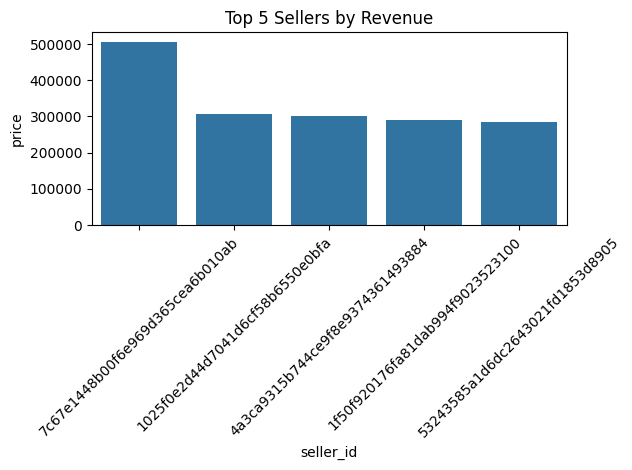

In [20]:
query = """
select *,dense_rank() over (order by price desc) as rn from 
  (select s.seller_id,
  SUM(py.payment_value) AS price
FROM sellers s
JOIN order_items o ON o.seller_id = s.seller_id
JOIN payments py ON o.order_id = py.order_id
GROUP BY s.seller_id) as a

"""

cursor.execute(query)
data = cursor.fetchall()

# Define column names correctly
df = pd.DataFrame(data, columns=["seller_id", "price","rank"])
df.head()

sns.barplot(x="seller_id", y="price", data=df.head())
plt.xticks(rotation=45)
plt.title("Top 5 Sellers by Revenue")
plt.tight_layout()
plt.show()



In [21]:
#Calculate the moving average of order values for each customer over their order history.

In [22]:
query = """select customer_id,order_purchase_timestamp,payment,avg(payment) over
(partition by customer_id order by order_purchase_timestamp rows between 2 preceding
and current row) as mov_avg from


(select o.customer_id,o.order_purchase_timestamp,py.payment_value payment from orders o join payments py on py.order_id=o.order_id) as a
"""

cursor.execute(query)
data = cursor.fetchall()
df=pd.DataFrame(data)

# Define column names correctly
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


In [23]:
#Calculate the cumulative sales per month for each year.

In [24]:
query = """
select y as years,m as months,p as payment ,sum(p) over(order by y,m) as cummulative_sales from

(select year(o.order_purchase_timestamp) y,month(o.order_purchase_timestamp) m,round(sum(py.payment_value),2) as p from orders o join payments py on o.order_id=py.order_id group by y,m order by y,m) as a
"""

cursor.execute(query)
data = cursor.fetchall()
df=pd.DataFrame(data,columns=["years","months","payment","cummulative_sales"])

# Define column names correctly
df

,years,months,payment,cummulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


In [25]:
# Calculate the year-over-year growth rate of total sales.

In [26]:
query = """


with a as(select year(o.order_purchase_timestamp) y,round(sum(py.payment_value),2) as p from orders o join payments py on o.order_id=py.order_id group by y order by y )

select y,((p-lag(p,1)over (order by y))/lag(p,1)over (order by y))*100 from a
"""

cursor.execute(query)
data = cursor.fetchall()
df=pd.DataFrame(data,columns=["years","yoy precentage"])

# Define column names correctly
df

,years,yoy precentage
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


In [27]:
# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [32]:
query = """

with a as(
select c.customer_id,min(o.order_purchase_timestamp) first_order from customers as c join orders o on c.customer_id=o.customer_id group by c.customer_id ),
b as
(select a.customer_id,count(distinct o.order_purchase_timestamp) from a join orders o on a.customer_id=o.customer_id and o.order_purchase_timestamp>first_order and o.order_purchase_timestamp<date_add(first_order,interval 6 month) group by a.customer_id)

select 100*count(distinct(a.customer_id))/count(distinct(b.customer_id)) from a left join b on a.customer_id=b.customer_id
"""

cursor.execute(query)
data = cursor.fetchall()
df=pd.DataFrame(data)

# Define column names correctly
df

,0
0,None


In [ ]:
#Identify the top 3 customers who spent the most money in each year.

In [39]:
query = """

select  c.customer_id,sum(py.payment_value) p,year(order_purchase_timestamp) years from customers c join orders o on c.customer_id=o.customer_id join payments py on py.order_id=o.order_id group by c.customer_id,years order by p,years desc limit 3
"""

cursor.execute(query)
data = cursor.fetchall()
df=pd.DataFrame(data)

# Define column names correctly
df

,0,1,2
0,197a2a6a77da93f678ea0d379f21da0a,0.0,2018
1,a73c1f73f5772cf801434bf984b0b1a7,0.0,2018
2,3532ba38a3fd242259a514ac2b6ae6b6,0.0,2018


                        customer_id  total_payment  year
0  ec5b2ba62e574342386871631fafd3fc    7274.879883  2018
1  f48d464a0baaea338cb25f816991ab1f    6922.209961  2018
2  e0a2412720e9ea4f26c1ac985f6a7358    4809.439941  2018
3  1617b1357756262bfa56ab541c47bc16   13664.080078  2017
4  c6e2731c5b391845f6800c97401a43a9    6929.310059  2017
5  3fd6777bbce08a352fddd04e4a7cc8f6    6726.660156  2017
6  a9dc96b027d1252bbac0a9b72d837fc6    1423.550049  2016
7  1d34ed25963d5aae4cf3d7f3a4cda173    1400.739990  2016
8  4a06381959b6670756de02e07b83815f    1227.780029  2016


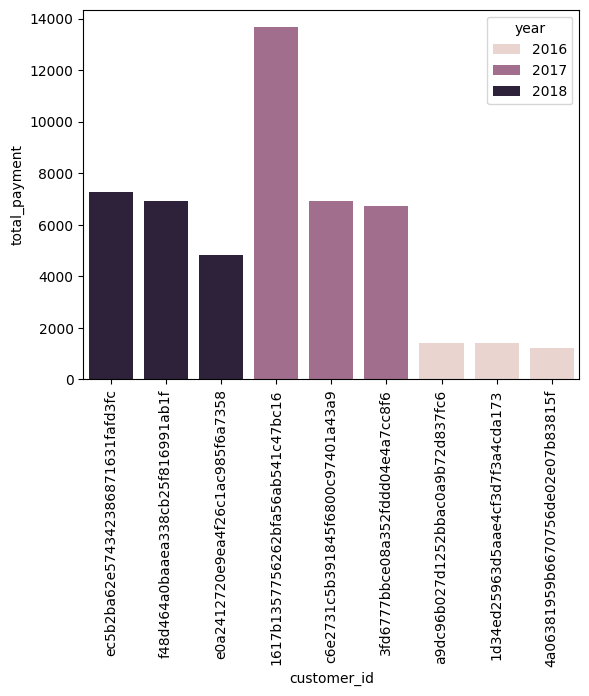

In [43]:
query = """
WITH ranked_customers AS (
    SELECT  
        c.customer_id,
        SUM(py.payment_value) AS total_payment,
        YEAR(o.order_purchase_timestamp) AS year,
        DENSE_RANK() OVER (
            PARTITION BY YEAR(o.order_purchase_timestamp)
            ORDER BY SUM(py.payment_value) DESC
        ) AS `rank`
    FROM customers c
    JOIN orders o ON c.customer_id = o.customer_id
    JOIN payments py ON py.order_id = o.order_id
    GROUP BY c.customer_id, YEAR(o.order_purchase_timestamp)
)
SELECT customer_id, total_payment, year
FROM ranked_customers
WHERE `rank` <= 3
ORDER BY year DESC, total_payment DESC
"""
cursor.execute(query)
data = cursor.fetchall()

# Create DataFrame with correct columns
df = pd.DataFrame(data, columns=["customer_id", "total_payment", "year"])
print(df)
sns.barplot(x="customer_id",y="total_payment",data=df,hue="year")
plt.xticks(rotation=90)
plt.show()
